# Barycenter DTW

In [11]:
import pandas as pd
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt


In [3]:
from ExtractShapelets import vector_accer, find_represt_shapelet

### Find representative shapelet

<AxesSubplot: >

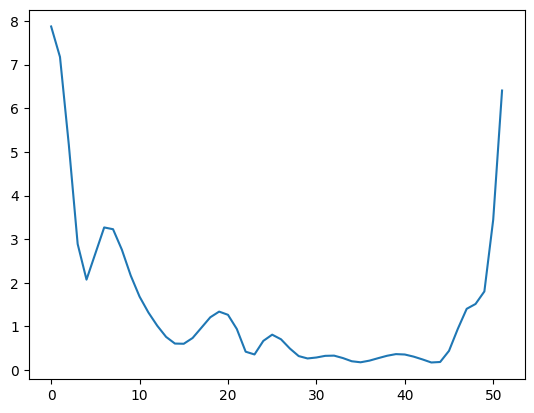

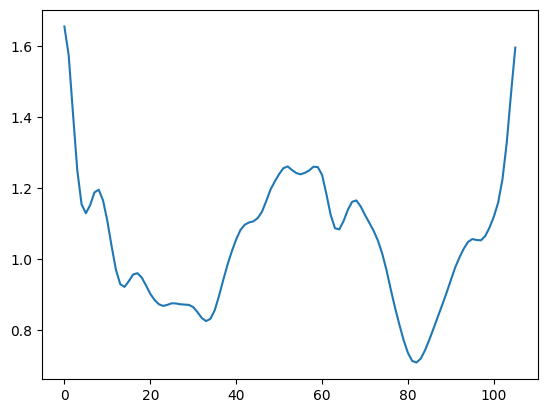

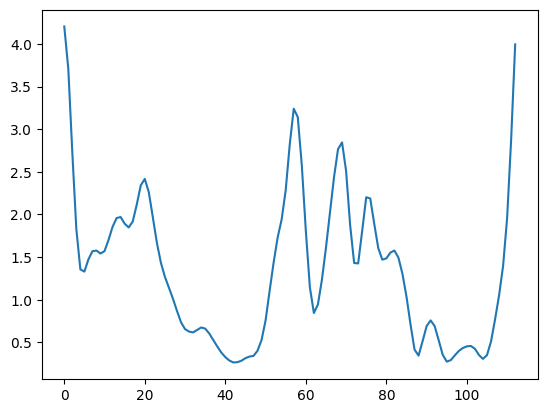

In [10]:
# Jump
zqw_jump = vector_accer("zqw\zqwjumpRAW.csv")['vm'][250:1800]
jump_rs = find_represt_shapelet(zqw_jump, min_dist=50, thres=0.99, max_dist=60)

# Walk
zqw_walk = vector_accer("zqw\zqwwalkRAW.csv")['vm'][0: 5400]
walk_rs = find_represt_shapelet(zqw_walk, min_dist=100, thres=0.95, max_dist=120)

# skip
zqw_skip = vector_accer("zqw\zqwskipRAW.csv")['vm'][0: 2700]
skip_rs = find_represt_shapelet(zqw_skip, min_dist=100, thres=0.8, max_dist=120)

pd.DataFrame(jump_rs).plot(legend=False)
pd.DataFrame(walk_rs).plot(legend=False)
pd.DataFrame(skip_rs).plot(legend=False)

In [12]:
# Function to resample a sequence to a target length
def resample_sequence(sequence, target_length):
    x = np.linspace(0, 1, len(sequence))
    f = interp1d(x, sequence, kind='linear', fill_value='extrapolate')
    x_new = np.linspace(0, 1, target_length)
    return f(x_new)

# Function to calculate DTW distance between two sequences
def dtw_distance(seq1, seq2):
    distance, path = fastdtw(seq1, seq2, dist=euclidean)
    return distance

# Function to calculate the barycenter sequence using DTW
def barycenter_dtw(df1, df2):
    # Resample the longer sequence to the length of the shorter one
    max_length = max(len(df1), len(df2))
    df1_resampled = pd.DataFrame({col: resample_sequence(df1[col].values, max_length) for col in df1.columns})
    df2_resampled = pd.DataFrame({col: resample_sequence(df2[col].values, max_length) for col in df2.columns})

    # Calculate DTW distance and alignment path
    _, path = fastdtw(df1_resampled.values, df2_resampled.values, dist=euclidean)

    # Use the alignment path to calculate the barycenter sequence
    barycenter_seq = df1_resampled.values + df2_resampled.values
    barycenter_seq /= 2

    # Convert the barycenter sequence back to DataFrame
    barycenter_df = pd.DataFrame(barycenter_seq, columns=df1.columns)

    return barycenter_df

Barycenter DataFrame:


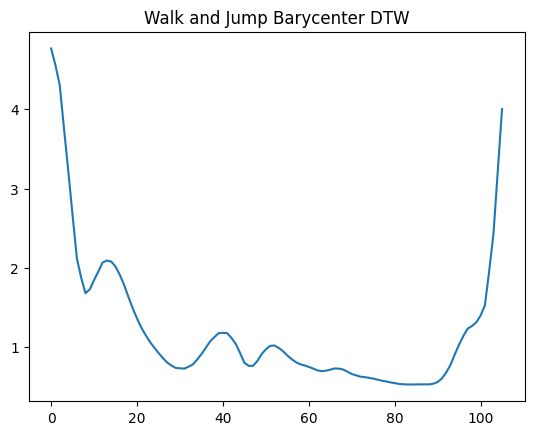

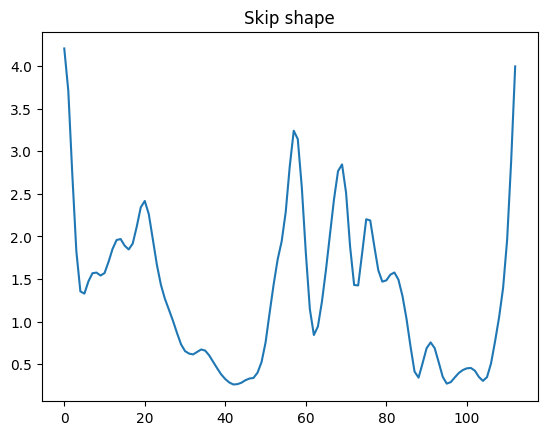

Distance of walk_jump_barycenter with skip is: 43.34676793049799
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084


In [13]:
df1 = pd.DataFrame(walk_rs)
df2 = pd.DataFrame(jump_rs)
barycenter_df = barycenter_dtw(df1, df2)
print("Barycenter DataFrame:")
ax = barycenter_df.plot(legend=False)
ax.set_title('Walk and Jump Barycenter DTW')
ax = pd.DataFrame(skip_rs).plot(legend=False)
ax.set_title("Skip shape")
plt.show()

# Distance Comparison
distance, path = fastdtw(barycenter_df, skip_rs)
print("Distance of walk_jump_barycenter with skip is:", distance)
distance, path = fastdtw(walk_rs, skip_rs)
print("Distance of walk with skip is:", distance)
distance, path = fastdtw(jump_rs, skip_rs)
print("Distance of jump with skip is:", distance)